# Data Analysis - Consumer Complaint Database

## Imports

In [1]:
!pip install plotly
!pip install tldextract -q
!pip install text2emotion

     |████████████████████████████████| 87 kB 3.4 MB/s 
     |████████████████████████████████| 57 kB 2.9 MB/s 
     |████████████████████████████████| 170 kB 10.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=1b97abc1ecb188eb091f248436ba17fcac2bd1391d7e2bba99d408f1a71a37e5
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [2]:
import sys
import os
import shutil
import math
import pandas as pd
import numpy as np
import pickle
import re
import gc
import random
import plotly.graph_objects as go
import itertools
from itertools import chain
from itertools import islice
import collections
import datetime, time
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
plt.style.use('seaborn-poster')  
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['text.color'] = 'm'
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
 
import nltk
import tldextract
nltk.download('stopwords')    # Collection of all stopwords
nltk.download('punkt')     # collection fo all punctuations
nltk.download('wordnet')   # wordnet of NLP
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk import word_tokenize   # to tokenize sentense
from nltk.stem import WordNetLemmatizer# word lemmatization
lemmatizer = WordNetLemmatizer()
import text2emotion as te

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.python.util import deprecation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, layers, backend, metrics
from tensorflow.keras.callbacks import EarlyStopping

import keras
import keras.backend as K
import sklearn
from sklearn import preprocessing
from sklearn.utils import shuffle
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer    # for test vectorization TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier


from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
print('Preparing the pickle file.....')
pickle_inp_path='inp_data.pkl'

Preparing the pickle file.....


In [4]:
## Loading Data from csv-file

In [5]:
data=pd.read_csv("/content/sample_data/complaints_csv.csv")
data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,186XX,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605.0
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,088XX,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257.0
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067,NaN,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,NaN,3198225.0
3,2021-06-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,90262,NaN,Consent not provided,Web,2021-06-08,Closed with explanation,Yes,NaN,4443078.0
4,2019-08-08,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,"FLAGSTAR BANK, FSB",ID,83706,NaN,NaN,Referral,2019-08-15,Closed with explanation,Yes,NaN,3342290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542577,2017-06-15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,91504,NaN,Consent not provided,Web,2017-06-16,Closed with non-monetary relief,Yes,NaN,2546430.0
1542578,2017-06-15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,91504,NaN,Consent not provided,Web,2017-06-16,Closed with non-monetary relief,Yes,NaN,2546436.0
1542579,2017-11-30,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,Based on information and belief this is not my...,NaN,PORTFOLIO RECOVERY ASSOCIATES INC,DC,200XX,NaN,Consent provided,Web,2017-11-30,Closed with explanation,Yes,NaN,2742957.0
1542580,2017-11-30,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,Chase transferred my home mortgage to XXXX XXX...,NaN,JPMORGAN CHASE & CO.,CA,940XX,Older American,Consent provided,Web,2017-11-30,Closed with explanation,Yes,NaN,2742959.0


In [6]:
pickle.dump((data),open(pickle_inp_path,'wb'))
print('Pickle files saved as ',pickle_inp_path)

Pickle files saved as  inp_data.pkl


In [7]:
## Loading Data from pickle-file

In [8]:
print('Loading the saved pickle files..')
data_input=pickle.load(open(pickle_inp_path, 'rb'))

Loading the saved pickle files..


In [9]:
data_input

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,186XX,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605.0
1,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,088XX,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257.0
2,2019-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19067,NaN,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,NaN,3198225.0
3,2021-06-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,90262,NaN,Consent not provided,Web,2021-06-08,Closed with explanation,Yes,NaN,4443078.0
4,2019-08-08,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,"FLAGSTAR BANK, FSB",ID,83706,NaN,NaN,Referral,2019-08-15,Closed with explanation,Yes,NaN,3342290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542577,2017-06-15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,91504,NaN,Consent not provided,Web,2017-06-16,Closed with non-monetary relief,Yes,NaN,2546430.0
1542578,2017-06-15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,91504,NaN,Consent not provided,Web,2017-06-16,Closed with non-monetary relief,Yes,NaN,2546436.0
1542579,2017-11-30,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,Based on information and belief this is not my...,NaN,PORTFOLIO RECOVERY ASSOCIATES INC,DC,200XX,NaN,Consent provided,Web,2017-11-30,Closed with explanation,Yes,NaN,2742957.0
1542580,2017-11-30,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,Chase transferred my home mortgage to XXXX XXX...,NaN,JPMORGAN CHASE & CO.,CA,940XX,Older American,Consent provided,Web,2017-11-30,Closed with explanation,Yes,NaN,2742959.0


In [10]:
try:
    data=data.drop('Unnamed: 0',axis=1)
except:
    pass
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542582 entries, 0 to 1542581
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Date received                 1542582 non-null  object 
 1   Product                       1542582 non-null  object 
 2   Sub-product                   1432573 non-null  object 
 3   Issue                         1542582 non-null  object 
 4   Sub-issue                     1198519 non-null  object 
 5   Consumer complaint narrative  503474 non-null   object 
 6   Company public response       671276 non-null   object 
 7   Company                       1542582 non-null  object 
 8   State                         1516424 non-null  object 
 9   ZIP code                      1402019 non-null  object 
 10  Tags                          185908 non-null   object 
 11  Consumer consent provided?    1087113 non-null  object 
 12  Submitted via               

In [11]:
# sub_sample1 = pd.DataFrame.sample(data, n=8, replace=False, weights=None, random_state=1, axis=1)
# sub_sample1

In [12]:
# data_input['Consumer complaint narrative']
print(data_input['Sub-issue'])

0                        Information belongs to someone else
1                           Denied request to lower payments
2                                   Account status incorrect
3          Their investigation did not fix an error on yo...
4                                                        NaN
                                 ...                        
1542577                             Account status incorrect
1542578                             Account status incorrect
1542579                                    Debt is not yours
1542580                                                  NaN
1542581                    Debt was result of identity theft
Name: Sub-issue, Length: 1542582, dtype: object


In [13]:
df=pd.DataFrame(data_input.columns)
print(df)

                               0
0                  Date received
1                        Product
2                    Sub-product
3                          Issue
4                      Sub-issue
5   Consumer complaint narrative
6        Company public response
7                        Company
8                          State
9                       ZIP code
10                          Tags
11    Consumer consent provided?
12                 Submitted via
13          Date sent to company
14  Company response to consumer
15              Timely response?
16            Consumer disputed?
17                  Complaint ID


## Data Sampling

In [14]:
company_label=data_input['Company'].tolist()
company=data_input.Company.unique().tolist()
# type(company)
print(company)
# len(company_label)
Total_Companies=len(company)
Total_Companies

['CAPITAL ONE FINANCIAL CORPORATION', 'ALLY FINANCIAL INC.', 'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'EQUIFAX, INC.', 'FLAGSTAR BANK, FSB', 'Experian Information Solutions Inc.', 'CORELOGIC INC', 'Comerica', 'JPMORGAN CHASE & CO.', 'NRA Group, LLC', 'BANK OF AMERICA, NATIONAL ASSOCIATION', 'Fidelity National Information Services, Inc. (FNIS)', 'CITIBANK, N.A.', 'Phoenix Financial Services LLC', 'Ocwen Financial Corporation', 'CARS Acquisition, LLC', 'TD BANK US HOLDING COMPANY', 'Navient Solutions, LLC.', 'FRANKLIN FIRST FINANCIAL, LTD', 'General Motors Financial Company, Inc.', 'Shellpoint Partners, LLC', 'Equitable Acceptance Corp', 'SYNCHRONY FINANCIAL', 'AMERICAN EXPRESS COMPANY', 'Westlake Services, LLC', 'Resurgent Capital Services L.P.', 'Ad Astra Recovery Services Inc', 'Home Point Financial Corporation', 'Asset Management Outsourcing, Inc.', 'KEYCORP', 'GOLD KEY CREDIT, INC.', 'Caliber Home Loans, Inc.', 'Tate and Kirlin Assoc', 'CITIZENS FINANCIAL GROUP, INC.', 'DISCOVER BA

5515

In [15]:
product_label=data_input['Product'].tolist()
product=data_input.Product.unique().tolist()
print(product)
# len(product_label)
Total_Products = len(product)
Total_Products

['Credit reporting, credit repair services, or other personal consumer reports', 'Vehicle loan or lease', 'Mortgage', 'Credit card or prepaid card', 'Checking or savings account', 'Debt collection', 'Money transfer, virtual currency, or money service', 'Student loan', 'Payday loan, title loan, or personal loan', 'Consumer Loan', 'Bank account or service', 'Money transfers', 'Credit reporting', 'Credit card', 'Other financial service', 'Payday loan', 'Prepaid card', 'Virtual currency']


18

In [16]:
issue_label=data_input['Issue'].tolist()
issue=data_input.Issue.unique().tolist()
print(issue)
# issue
Number_of_Issues=len(issue)
Number_of_Issues

['Incorrect information on your report', 'Struggling to pay your loan', "Problem with a credit reporting company's investigation into an existing problem", 'Trouble during payment process', 'Improper use of your report', 'Problem with fraud alerts or security freezes', 'Trouble using the card', 'Managing an account', 'Identity theft protection or other monitoring services', 'Fees or interest', 'Getting a credit card', 'Attempts to collect debt not owed', 'Fraud or scam', 'Closing on a mortgage', 'Struggling to repay your loan', 'Problem when making payments', 'Managing the loan or lease', 'Struggling to pay mortgage', 'Problem with additional add-on products or services', 'Advertising and marketing, including promotional offers', 'Took or threatened to take negative or legal action', 'Written notification about debt', 'Problem with a lender or other company charging your account', 'Other features, terms, or problems', 'Loan servicing, payments, escrow account', 'Unable to get your cred

165

In [17]:
print('Preparing the pickle file for sub_sample.....')
pickle_inp_path='ss_data.pkl'

Preparing the pickle file for sub_sample.....


In [18]:
new_df=pd.DataFrame(data=[data_input['Company'],data_input['Product'],
                          data_input['Consumer complaint narrative'],data_input['Issue'], data_input['Sub-issue']])

In [19]:

pickle.dump((new_df),open(pickle_inp_path,'wb'))
print('Pickle files saved as ',pickle_inp_path)


Pickle files saved as  ss_data.pkl


In [20]:
print('Loading the saved pickle files..')
ss_data=pickle.load(open(pickle_inp_path, 'rb'))

Loading the saved pickle files..


In [21]:
sub_sample2=ss_data.transpose()
sub_sample3 = sub_sample2.sample(n=50000,axis=0,replace = True)
sub_sample3_skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
sub_sample3_skf

StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [22]:
sscln=sub_sample3.fillna('XYZ')
sscln
df=pd.DataFrame(sscln)
df.to_csv("sub_sample.csv")

In [23]:
sscln.shape

(50000, 5)

In [24]:
allcompln=[]
for compln in sscln['Consumer complaint narrative']:
    allcompln.append([compln])

In [25]:
print(len(allcompln))
allcompln[4929]

50000


['XYZ']

## Applyimg NLP techniques for data cleaning / data pre-processing

In [26]:
def remove_stopwords(corpus, stop_words):
        return [tokens for tokens in corpus if not tokens in stop_words]

In [27]:
def remove_punctuations(stopwords_removed):
    return  [tokens for tokens in stopwords_removed if tokens.isalpha()]

In [28]:
def lower_case(no_punct):
    return  [tokens.lower() for tokens in no_punct]

In [29]:
def get_lemma(lower_tokens):
    return  [lemmatizer.lemmatize(tokens) for tokens in lower_tokens]

In [30]:
import itertools
from itertools import chain

def cleaning(corpus_text):
    cleaned_corpus=[]
    corpus = nltk.sent_tokenize(corpus_text)
    word_list = [word_tokenize(text) for text in corpus]
    corpus_lower = [token.lower() for token in corpus] # Lowercases the words.
    corpus_lower = [re.sub(r'\W',' ',token) for token in corpus_lower]  # Eliminates parentheses.
    corpus_lower = [re.sub(r'\s+',' ',token) for token in corpus_lower] # Eliminates double spaces.

    counter_word_list = []

    for sentence in corpus_lower:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            counter_word_list.append(token)
    stop_words = list(stopwords.words('english'))
    stopwords_removed =  [remove_stopwords(token, stop_words) for token in word_list]
    no_punct = [remove_punctuations(tokens) for tokens in stopwords_removed]
    lower_tokens = [lower_case(tokens) for tokens in no_punct]
    lemmatized_tokens = [get_lemma(tokens) for tokens in lower_tokens]
    new_wordlist = list(chain(*lemmatized_tokens))
    new_word_freq = Counter(new_wordlist)
    cleaned_corpus.append(new_wordlist)
    return cleaned_corpus

In [31]:
from collections import Counter
cleantext=[]
for i in allcompln:
    text = " ".join(str(x) for x in i)
    clean_text = cleaning(text)
    for y in clean_text:
        cleantext.append(' '.join(y).replace('xxxx', ''))  
# print(cleantext)
len(cleantext)

50000

In [32]:
cleantext

['i writing dispute following information file i recently received copy experian credit report the credit report showed credit inquiry i dont recall authorizing i understand allowed put inquiry file unless i authorized please inquiry removed credit file making difficult acquire credit the fcra state permissible purpose pulling someone credit a firm offer credit b insurance employment court order the following credit inquiry related none aforementioned permissible                   please remove inquiry credit report immediately',
 'i contacted company make settlement offer expressed concern balance extremely incorrect they refused investigate legitimacy balance started settlement offered year random select debtor',
 'xyz',
 'xyz',
 'xyz',
 'xyz',
 'i received call student loan company stating debt i needed pay i never applied student loan i never gone college i quickly opened account   review credit report i found student loan fraudulent account i never opened gave anyone consent open 

In [33]:
textall=np.array(cleantext,str)
newtext=[]
for i in textall:
    if len(i) <= 3:
        pass
    else:
        newtext.append(i)

In [34]:
print(len(newtext))
print(newtext)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
newtext[3][:1000]

'i received many call student loan company asking money i never went school i confused happening i pulled credit i saw several student loan item report mine please get fraudulent item report    depted     depted  u dept ed       '

# Sentiment Analysis

In [36]:
from textblob import TextBlob 

polarity=[]
subjectivity=[]
sentiment=[]
i=0
while i!=len(newtext):
    out=TextBlob(newtext[i]).sentiment
    polarity.append(out[0])
    if out[0]>0:
        sentiment.append("Positive")
    elif out[0]<0:
        sentiment.append("Negative")
    else:
        sentiment.append("Neutral")
    subjectivity.append(out[1])
    i+=1
senti_df=pd.DataFrame({
    "Consumer complaint narrative":newtext,
    "Polarity":polarity,
    "Subjectivity":subjectivity,
    "Sentiment":sentiment
})
print(len(senti_df))
senti_df.head()

16366


,Consumer complaint narrative,Polarity,Subjectivity,Sentiment
0,i writing dispute following information file i...,-0.100000,0.321429,Negative
1,i contacted company make settlement offer expr...,-0.312500,0.750000,Negative
2,i received call student loan company stating d...,0.111111,0.666667,Positive
3,i received many call student loan company aski...,0.033333,0.400000,Positive
4,im second year i served country ran tough ti...,-0.015103,0.456810,Negative


In [37]:
senti_df['Consumer complaint narrative']

0        i writing dispute following information file i...
1        i contacted company make settlement offer expr...
2        i received call student loan company stating d...
3        i received many call student loan company aski...
4        im second year   i served country ran tough ti...
                               ...                        
16361    i credit card    i always made payment time fo...
16362    secure message center back inbox reply from yo...
16363    i victim identity i notified collection credit...
16364    i decided get credit pulled due collection let...
16365    a back i lost wallet personal information insi...
Name: Consumer complaint narrative, Length: 16366, dtype: object

In [38]:
polarity=[]
subjectivity=[]
sentiment=[]
i=0
while i!=len(newtext):
    out=TextBlob(str(newtext[i])).sentiment
    polarity.append(out[0])
    if out[0]>0:
        sentiment.append("Positive")
    elif out[0]<0:
        sentiment.append("Negative")
    else:
        sentiment.append("Neutral")
    subjectivity.append(out[1])
    i+=1
print(len(polarity),len(subjectivity),len(sentiment),len(newtext))

16366 16366 16366 16366


In [39]:
customer_complaint_sentiment=pd.DataFrame({
    "Consumer complaint narrative":newtext,
    "Polarity":polarity,
    "Subjectivity":subjectivity,
    "Sentiment":sentiment
})
customer_complaint_sentiment=customer_complaint_sentiment.sample(n=len(customer_complaint_sentiment),random_state=42)
customer_complaint_sentiment=customer_complaint_sentiment.reset_index(drop=True)
customer_complaint_sentiment=customer_complaint_sentiment.fillna("Not Available")
customer_complaint_sentiment.to_csv("customer_complaint_sentiment.csv")
customer_complaint_sentiment.head()

,Consumer complaint narrative,Polarity,Subjectivity,Sentiment
0,i refinanced home another lender it i yet ...,0.009361,0.387488,Positive
1,from i contacted fbc mortgage llc underwrite...,-0.111111,0.298765,Negative
2,had gotten aprrove another loan representative...,-0.225000,0.235000,Negative
3,i writing delete following information file th...,-0.025000,0.383333,Negative
4,equifax reporting address massachusetts ...,-0.068182,0.500000,Negative


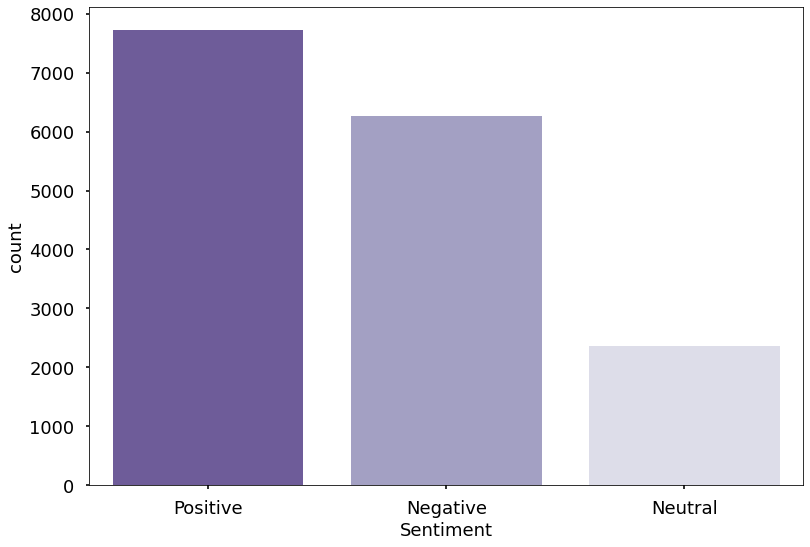

In [40]:
sns.countplot(customer_complaint_sentiment.Sentiment,palette="Purples_r")

# Emotion Detection

In [41]:
customer_complaint_sentiment=customer_complaint_sentiment.reset_index(drop=True)
complaints=customer_complaint_sentiment['Consumer complaint narrative']
complaints=complaints.sample(n=1000)

emo=[]
for i in complaints:
    res=te.get_emotion(i)
    ky=list(res.keys())
    val=list(res.values())
    emo.append(ky[val.index(max(val))])
emotion_data=pd.DataFrame({"Complaints":complaints,"Emotion":emo})
emotion_data.to_csv("emotions_in_complaints.csv")
emotion_data=emotion_data[['Complaints','Emotion']]
print(emotion_data)

                                              Complaints Emotion
3202   my father passed away   pt i left voicemail no...    Fear
11225  this regard chase sapphire reserve credit card...    Fear
10713  the mortgage foreclosed yet continue sending i...    Fear
9478   class agency    sending collection notice amou...    Fear
12664   year old used credit card without knowledge a...    Fear
...                                                  ...     ...
934    i made previous complaint regarding   balance ...    Fear
7370   omega rms comply fair debt collection practice...    Fear
11335                    fraudelent account on my report    Fear
9566   this  bank doesnt value business refuse proces...    Fear
7631       reporting balance collection i already pai...    Fear

[1000 rows x 2 columns]


In [42]:
emo_label=[]
emo_count=[]
for i in emotion_data.Emotion.unique():
    df=emotion_data[emotion_data['Emotion']==i]
    lblcat=df['Emotion'].value_counts().index.tolist()
    emo_label.extend(lblcat)
    lblval=df['Emotion'].value_counts().tolist()
    emo_count.extend(lblval)
lbldf=pd.DataFrame({"Labels":emo_label,"Count":emo_count})
fig=px.bar(lbldf,x="Labels",y="Count",text="Count",color="Count",title="Count of Labels in Test Data")
fig.update_layout(
    font=dict(
        family="Times New Roman, Bold",
        size=20,
        color="purple"
    )
)
fig.show()

# Topic Modelling

In [43]:
import pandas as pd
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation

In [44]:
sscln

,Company,Product,Consumer complaint narrative,Issue,Sub-issue
151557,Experian Information Solutions Inc.,"Credit reporting, credit repair services, or o...",I am writing to dispute the following informat...,Improper use of your report,Credit inquiries on your report that you don't...
273145,"National Credit Systems,Inc.",Debt collection,I contacted the company to make a settlement o...,Written notification about debt,Didn't receive notice of right to dispute
1512307,"Navient Solutions, LLC.",Student loan,XYZ,Dealing with my lender or servicer,Don't agree with fees charged
255139,Experian Information Solutions Inc.,"Credit reporting, credit repair services, or o...",XYZ,Incorrect information on your report,Information belongs to someone else
507323,"TRANSUNION INTERMEDIATE HOLDINGS, INC.","Credit reporting, credit repair services, or o...",XYZ,Problem with a credit reporting company's inve...,Investigation took more than 30 days
...,...,...,...,...,...
648552,"Seterus, Inc.",Mortgage,XYZ,"Loan servicing, payments, escrow account",XYZ
930657,Experian Information Solutions Inc.,"Credit reporting, credit repair services, or o...",A while back I lost my wallet with all my pers...,Incorrect information on your report,Information belongs to someone else
1195448,Experian Information Solutions Inc.,"Credit reporting, credit repair services, or o...",XYZ,Incorrect information on your report,Old information reappears or never goes away
363735,NATIONSTAR MORTGAGE,Mortgage,XYZ,Trouble during payment process,XYZ


In [45]:
allissuefinal = [i for i in sscln['Issue']+' '+sscln['Sub-issue']]
allissuefinal    

["Improper use of your report Credit inquiries on your report that you don't recognize",
 "Written notification about debt Didn't receive notice of right to dispute",
 "Dealing with my lender or servicer Don't agree with fees charged",
 'Incorrect information on your report Information belongs to someone else',
 "Problem with a credit reporting company's investigation into an existing problem Investigation took more than 30 days",
 "Problem with a credit reporting company's investigation into an existing problem Investigation took more than 30 days",
 'Incorrect information on your report Information belongs to someone else',
 'Attempts to collect debt not owed Debt is not yours',
 'Incorrect information on your report Information belongs to someone else',
 'Problem with a purchase shown on your statement Card was charged for something you did not purchase with the card',
 'Incorrect information on your report Information belongs to someone else',
 "Problem with a credit reporting comp

In [46]:
cleanissue=[]
for i in allissuefinal:
#     text = " ".join(str(x) for x in i)
    clean_issue = cleaning(i)
    for y in clean_issue:
        cleanissue.append(' '.join(y).replace('xxxx', ''))
len(cleanissue)

50000

In [47]:
cleanissue

['improper use report credit inquiry report recognize',
 'written notification debt did receive notice right dispute',
 'dealing lender servicer do agree fee charged',
 'incorrect information report information belongs someone else',
 'problem credit reporting company investigation existing problem investigation took day',
 'problem credit reporting company investigation existing problem investigation took day',
 'incorrect information report information belongs someone else',
 'attempt collect debt owed debt',
 'incorrect information report information belongs someone else',
 'problem purchase shown statement card charged something purchase card',
 'incorrect information report information belongs someone else',
 'problem credit reporting company investigation existing problem wa notified investigation status result',
 'incorrect information report information belongs someone else',
 'problem credit reporting company investigation existing problem wa notified investigation status resu

In [48]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=5000)

In [49]:
vect_text=vect.fit_transform(cleanissue)

In [50]:
vect_text

<50000x394 sparse matrix of type '<class 'numpy.float64'>'
	with 299990 stored elements in Compressed Sparse Row format>

In [51]:
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [52]:
print("Issues Document: ")
for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

Issues Document: 
Topic  0 :  2.9369788897953732 %
Topic  1 :  73.56633063400349 %
Topic  2 :  2.9369788898124907 %
Topic  3 :  2.937252450948507 %
Topic  4 :  2.937050003796061 %
Topic  5 :  2.936997076577632 %
Topic  6 :  2.936989272985318 %
Topic  7 :  2.937052661112826 %
Topic  8 :  2.9369875651288067 %
Topic  9 :  2.937382555839499 %


In [53]:
issuestopic = {}
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    # print("\n"+"Topic "+str(i)+": ")
    issuestopic["Topic "+str(i)] = ' '.join([i[0] for i in sorted_words])
issuestopic

{'Topic 0': 'debt owed attempt collect payment xyz process escrow servicing trouble',
 'Topic 1': 'investigation problem reporting credit company report existing error fix use',
 'Topic 2': 'xyz collection foreclosure modification loan mortgage debt pay written notification',
 'Topic 3': 'information belongs else someone incorrect report info given verification disclosure',
 'Topic 4': 'problem investigation statement company day took purchase reporting credit existing',
 'Topic 5': 'fraud term communication tactic call frequent repeated xyz scam problem',
 'Topic 6': 'managing account lease loan record public billing service xyz closing',
 'Topic 7': 'fee lender interest problem xyz score getting servicer credit dealing',
 'Topic 8': 'personal withdrawal deposit account closing xyz opening managing management card',
 'Topic 9': 'incorrect information report account status credit mine missing old away'}

In [54]:
allcompln=[]
for compln in sscln['Consumer complaint narrative']:
    allcompln.append([compln])

In [55]:
allcompln


[["I am writing to dispute the following information in my file. I recently received a copy of my Experian credit report. The credit report showed credit inquiries that I dont recall authorizing. I understand that you shouldn't be allowed to put an inquiry on my file unless I have authorized it. Please have this inquiry removed from my credit file because it is making it very difficult for me to acquire credit. \n\nThe FCRA states that the only permissible purpose for pulling someones credit is for : A. Firm Offer of Credit B. Insurance C. Employment D. Court Order The following credit inquiries are related to none of the aforementioned permissible XXXX XX/XX/XXXX XXXX XXXX XX/XX/XXXX XXXX XXXX XXXX XX/XX/XXXX XXXX XXXX XX/XX/XXXX XXXX XXXX XXXX XX/XX/XXXX XXXX XXXX, XXXX XXXX XX/XX/XXXX XXXX XXXX  XXXX XX/XX/XXXX Please remove these inquiries from my credit report immediately."],
 ['I contacted the company to make a settlement offer and expressed concerns over the balance being extrem

In [56]:
cleancompln=[]
for i in allcompln:
    text = " ".join(str(x) for x in i)
    clean_compln = cleaning(text)
    for y in clean_compln:
        cleancompln.append(' '.join(y).replace('xxxx', ''))
len(cleancompln)

50000

In [57]:
cleancompln

['i writing dispute following information file i recently received copy experian credit report the credit report showed credit inquiry i dont recall authorizing i understand allowed put inquiry file unless i authorized please inquiry removed credit file making difficult acquire credit the fcra state permissible purpose pulling someone credit a firm offer credit b insurance employment court order the following credit inquiry related none aforementioned permissible                   please remove inquiry credit report immediately',
 'i contacted company make settlement offer expressed concern balance extremely incorrect they refused investigate legitimacy balance started settlement offered year random select debtor',
 'xyz',
 'xyz',
 'xyz',
 'xyz',
 'i received call student loan company stating debt i needed pay i never applied student loan i never gone college i quickly opened account   review credit report i found student loan fraudulent account i never opened gave anyone consent open 

In [58]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=5000)

In [59]:
vect_text=vect.fit_transform(cleancompln)

In [60]:
vect_text

<50000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 890214 stored elements in Compressed Sparse Row format>

In [61]:
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [62]:
print("Complaints Document: ")
for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

Complaints Document: 
Topic  0 :  1.5114936713730995 %
Topic  1 :  1.511204183752451 %
Topic  2 :  1.5112034266487722 %
Topic  3 :  79.61720035735125 %
Topic  4 :  1.5112033219601613 %
Topic  5 :  1.511203407244351 %
Topic  6 :  8.292852555678405 %
Topic  7 :  1.5112322486009704 %
Topic  8 :  1.5112034108594385 %
Topic  9 :  1.5112034165310997 %


In [63]:
complaintstopic = {}
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    complaintstopic["Topic "+str(i)] = ' '.join([i[0] for i in sorted_words])
complaintstopic
# complaintstopic = pd.DataFrame(complaintstopic, index=[0])
# complaintstopic

{'Topic 0': 'day inaccurate compromised item breach demand ignored deleted immediately data',
 'Topic 1': 'midland buyer chime exposed plaintiff claim audit diversified outsourcing metro',
 'Topic 2': 'hindering server thoroughly screwed enrollment vw prescribed prescription shell female',
 'Topic 3': 'credit account report information payment debt company reporting time card',
 'Topic 4': 'xyz board warranty inquiry hospital depted air student credit law',
 'Topic 5': 'garnishment wage lvnv plenty resurgent statue target westlake lately wall',
 'Topic 6': 'chase consumer bank covid fund unverified card deposit fee transaction',
 'Topic 7': 'loan mortgage payment forbearance modification navient student school interest property',
 'Topic 8': 'pnc ic gm performance georgia toll erc connect ineligible nevada',
 'Topic 9': 'trans union enhanced michigan idenity revolving western sagestream alliant sequium'}

# Applying ML Classifiers

In [64]:
labels=customer_complaint_sentiment['Sentiment']
preds=customer_complaint_sentiment['Consumer complaint narrative']

skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
print(skf.get_n_splits(labels, preds))
for train_index, test_index in skf.split(labels, preds):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = labels[train_index], labels[test_index]
  y_train, y_test = preds[train_index], preds[test_index]

# x_train,x_test,y_train,y_test=train_test_split(preds, labels, test_size=0.4, random_state=42)
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.9)
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

10
TRAIN: [    1     2     4 ... 16363 16364 16365] TEST: [    0     3     9 ... 16335 16347 16358]
TRAIN: [    0     2     3 ... 16363 16364 16365] TEST: [    1    10    19 ... 16336 16348 16359]
TRAIN: [    0     1     3 ... 16363 16364 16365] TEST: [    2     4    21 ... 16337 16350 16360]
TRAIN: [    0     1     2 ... 16363 16364 16365] TEST: [   11    22    32 ... 16339 16351 16361]
TRAIN: [    0     1     2 ... 16363 16364 16365] TEST: [    5    12    23 ... 16340 16352 16362]
TRAIN: [    0     1     2 ... 16362 16363 16365] TEST: [    6    13    24 ... 16345 16353 16364]
TRAIN: [    0     1     2 ... 16363 16364 16365] TEST: [    7    14    25 ... 16331 16342 16354]
TRAIN: [    0     1     2 ... 16363 16364 16365] TEST: [   15    26    49 ... 16343 16349 16355]
TRAIN: [    0     1     2 ... 16363 16364 16365] TEST: [    8    16    27 ... 16333 16344 16356]
TRAIN: [    0     1     2 ... 16361 16362 16364] TEST: [   17    28    37 ... 16357 16363 16365]


In [65]:
from statistics import *
sgd_accu_stratified = []
sgdce=SGDClassifier()
sgdce = sgdce.fit(tfidf_train,y_train)
predsgd = sgdce.predict(tfidf_test)
scoresgd=accuracy_score(y_test,predsgd)
print(f'Accuracy: {round(scoresgd*100,2)}%')

sgd_accu_stratified.append(sgdce.score(tfidf_test,y_test))
print('\nkfold_val_acc:',mean(sgd_accu_stratified)*100, '%')
# print('\nStandard Deviation is:', stdev(sgd_accu_stratified))


Accuracy: 0.0%

kfold_val_acc: 0.0 %


In [66]:
DT_accu_stratified=[]
DT = DecisionTreeClassifier()
DT.fit(tfidf_train, y_train)
preddt=DT.predict(tfidf_test)
scoredt=accuracy_score(y_test,preddt)
print(f'Accuracy: {round(scoredt*100,2)}%')

DT_accu_stratified.append(DT.score(tfidf_test,y_test))
print('\nkfold_val_acc:',mean(DT_accu_stratified)*100, '%')
# print('\nStandard Deviation is:', stdev(DT_accu_stratified))

Accuracy: 0.49%

kfold_val_acc: 0.4889975550122249 %


In [67]:
RF_accu_stratified=[]
rf = RandomForestClassifier()
rf.fit(tfidf_train, y_train)
predrf=rf.predict(tfidf_test)
scorerf=accuracy_score(y_test,predrf)
print(f'Accuracy: {round(scorerf*100,2)}%')

RF_accu_stratified.append(rf.score(tfidf_test,y_test))
print('\nkfold_val_acc:',mean(RF_accu_stratified)*100, '%')

Accuracy: 0.49%

kfold_val_acc: 0.4889975550122249 %


In [68]:
ridge_accu_stratified=[]
ridge = RidgeClassifier()
ridge.fit(tfidf_train, y_train)
predridge=ridge.predict(tfidf_test)
scoreridge=accuracy_score(y_test,predridge)
print(f'Accuracy: {round(scoreridge*100,2)}%')

ridge_accu_stratified.append(ridge.score(tfidf_test,y_test))
print('\nkfold_val_acc:',mean(ridge_accu_stratified)*100, '%')

Accuracy: 0.49%

kfold_val_acc: 0.4889975550122249 %


~~~~~~~~~~~~~~~~~~~~ Applying Passive Aggresive Classifier ~~~~~~~~~~~~~~~~~~

	Accuracy for Passive Aggresive Classifier => 81.2%
              precision    recall  f1-score   support

    Negative       0.81      0.80      0.81      1898
     Neutral       0.74      0.77      0.75       680
    Positive       0.84      0.83      0.84      2332

    accuracy                           0.81      4910
   macro avg       0.79      0.80      0.80      4910
weighted avg       0.81      0.81      0.81      4910



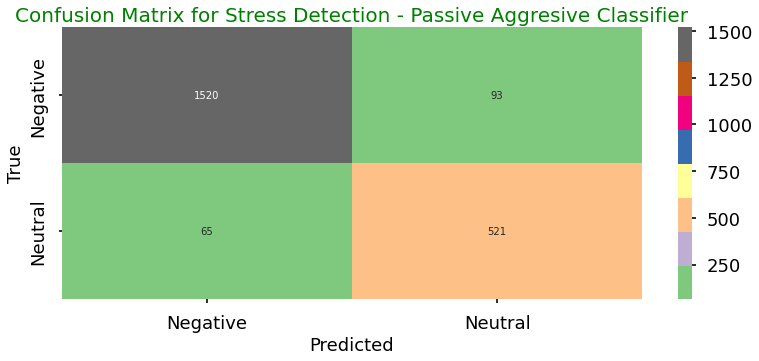


~~~~~~~~~~~~~~~~~~~~ Applying Naïve Bayes Classifier ~~~~~~~~~~~~~~~~~~

	Accuracy for Naïve Bayes Classifier => 58.39%
              precision    recall  f1-score   support

    Negative       0.76      0.33      0.46      1898
     Neutral       1.00      0.01      0.03       680
    Positive       0.55      0.96      0.70      2332

    accuracy                           0.58      4910
   macro avg       0.77      0.43      0.39      4910
weighted avg       0.69      0.58      0.51      4910



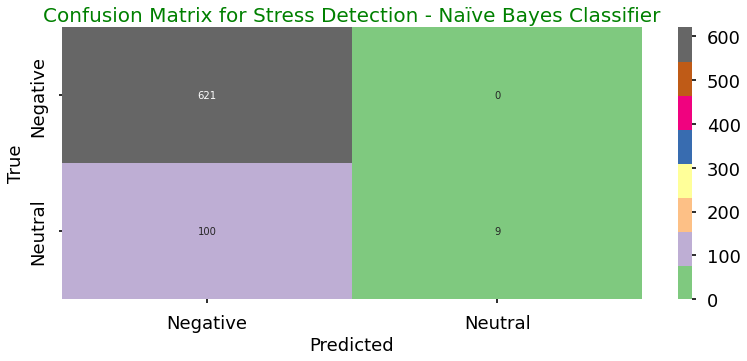

In [69]:
labels=customer_complaint_sentiment['Sentiment']
preds=customer_complaint_sentiment['Consumer complaint narrative']
x_train,x_test,y_train,y_test=train_test_split(preds, labels, test_size=0.3, random_state=None)
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.9)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

allscr=[]
prec=[]
rcl=[]
f1=[]
all_conf_mat=[]
algo_names=["Passive Aggresive Classifier",
            "Naïve Bayes Classifier"
      ]
algos=[PassiveAggressiveClassifier(random_state=0),
       MultinomialNB()]
for i in range(len(algos)):
    print("~~~~~~~~~~~~~~~~~~~~ Applying {} ~~~~~~~~~~~~~~~~~~\n".format(algo_names[i]))
    model = algos[i]
    model.fit(tfidf_train, y_train)
    modelpred=model.predict(tfidf_test)
    scoremodel=round(accuracy_score(y_test,modelpred),4)*100
    allscr.append(scoremodel)
    prec.append(round(precision_score(y_test,modelpred,average="micro"),4)*100)
    rcl.append(round(recall_score(y_test,modelpred,average="micro"),4)*100)
    # f1.append(round(f1_score(y_test,modelpred,average="micro"),4)*100)
    print("\tAccuracy for {} => {}%".format(algo_names[i],scoremodel))
    ct=pd.crosstab(y_test, modelpred, rownames=['True'], colnames=['Predicted'], margins=True)
    all_conf_mat.append(ct)
    print(classification_report(y_test,modelpred))
    plt.figure(figsize=(13,5))
    plt.title("Confusion Matrix for Stress Detection - {}".format(algo_names[i]), fontsize=20,color="#008000")
    sns.heatmap(ct.iloc[:2,:2],fmt="d",annot=True,cmap="Accent")
    plt.show()
    print()

In [70]:
all_conf_mat[0].iloc[:3,:3]

Predicted,Negative,Neutral,Positive
True,,,
Negative,1520,93,285
Neutral,65,521,94
Positive,293,93,1946


In [71]:
all_conf_mat[1].iloc[:3,:3]


Predicted,Negative,Neutral,Positive
True,,,
Negative,621,0,1277
Neutral,100,9,571
Positive,95,0,2237


## Applying ML Classifiers

In [72]:
precision=[]                    #Initialise empty lists for performance metrics
recall=[]
f1_score=[]
accuracy=[]
classifier_name=[]

In [73]:
# ### Data split and pre-processinglabels=customer_complaint_sentiment['Sentiment']
# preds=customer_complaint_sentiment['Consumer complaint narrative']

# skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
# print(skf.get_n_splits(labels, preds))
# for train_index, test_index in skf.split(labels, preds):
#   print("TRAIN:", train_index, "TEST:", test_index)
#   X_train, X_test = labels[train_index], labels[test_index]
#   y_train, y_test = preds[train_index], preds[test_index]

# # x_train,x_test,y_train,y_test=train_test_split(preds, labels, test_size=0.4, random_state=42)
# tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.9)
# tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
# tfidf_test=tfidf_vectorizer.transform(X_test)

In [74]:
labels=customer_complaint_sentiment['Sentiment']
preds=customer_complaint_sentiment['Consumer complaint narrative']
x_train,x_test,y_train,y_test=train_test_split(preds, labels, test_size=0.3, random_state=42)
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.9)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [75]:
# ### Perceptron Classifier

Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1496,105,303,1904
Neutral,73,541,87,701
Positive,306,132,1867,2305
All,1875,778,2257,4910


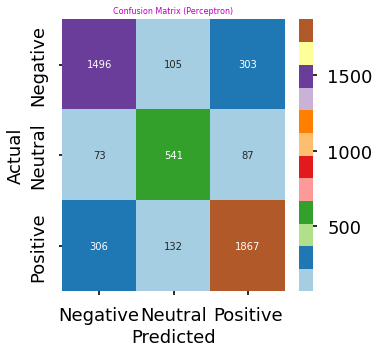

In [76]:
perceptron = Perceptron(tol=1e-3)                              
perceptron = perceptron.fit(tfidf_train, y_train)
svpred = perceptron.predict(tfidf_test)
scoreperceptron=accuracy_score(y_test,svpred)
# print(f'Accuracy: {round(scoreperceptron*100,2)}%')

clsfr1 = pd.crosstab(y_test, svpred, rownames=['Actual'], colnames=['Predicted'], margins=True)

plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (Perceptron)",fontsize=8)
sns.heatmap(clsfr1.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr1.iloc[0,0]/(clsfr1.iloc[0,0]+clsfr1.iloc[0,1]))
recall.append(clsfr1.iloc[0,0]/(clsfr1.iloc[0,0]+clsfr1.iloc[1,0]))
f1_score.append(2*clsfr1.iloc[0,0]/(2*clsfr1.iloc[0,0]+clsfr1.iloc[0,1]+clsfr1.iloc[1,0]))
accuracy.append(round(scoreperceptron,2))
classifier_name.append("Perceptron")
clsfr1

In [77]:
# ### Stochastic Gradient Descent Classifier

Accuracy: 79.33%


Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1419,70,415,1904
Neutral,61,516,124,701
Positive,280,65,1960,2305
All,1760,651,2499,4910


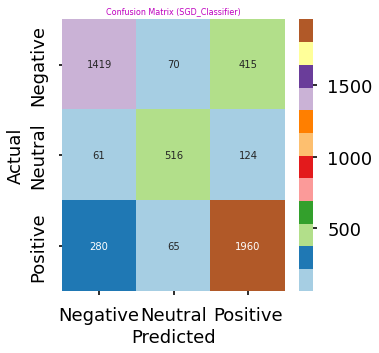

In [78]:
sgdclfr=SGDClassifier()
sgdclfr = sgdclfr.fit(tfidf_train,y_train)
predsgd = sgdclfr.predict(tfidf_test)
scoresgd=accuracy_score(y_test,predsgd)
print(f'Accuracy: {round(scoresgd*100,2)}%')

clsfr2 = pd.crosstab(y_test, predsgd, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (SGD_Classifier)",fontsize=8)
sns.heatmap(clsfr2.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr2.iloc[0,0]/(clsfr2.iloc[0,0]+clsfr2.iloc[0,1]))
recall.append(clsfr2.iloc[0,0]/(clsfr2.iloc[0,0]+clsfr2.iloc[1,0]))
f1_score.append(2*clsfr2.iloc[0,0]/(2*clsfr2.iloc[0,0]+clsfr2.iloc[0,1]+clsfr2.iloc[1,0]))
accuracy.append(round(scoresgd,2))
classifier_name.append("SGD_Classifier")
clsfr2

In [79]:
# ### Naive Bias Classifier


Accuracy: 55.01%


Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1023,470,411,1904
Neutral,74,624,3,701
Positive,802,449,1054,2305
All,1899,1543,1468,4910


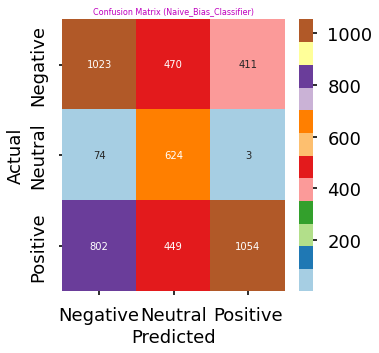

In [80]:
G_NB = BernoulliNB()
G_NB = G_NB.fit(tfidf_train, y_train)
prednb=G_NB.predict(tfidf_test)
scorenb=accuracy_score(y_test,prednb)
print(f'Accuracy: {round(scorenb*100,2)}%')

clsfr3 = pd.crosstab(y_test, prednb, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (Naive_Bias_Classifier)",fontsize=8)
sns.heatmap(clsfr3.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr3.iloc[0,0]/(clsfr3.iloc[0,0]+clsfr3.iloc[0,1]))
recall.append(clsfr3.iloc[0,0]/(clsfr3.iloc[0,0]+clsfr3.iloc[1,0]))
f1_score.append(2*clsfr3.iloc[0,0]/(2*clsfr3.iloc[0,0]+clsfr3.iloc[0,1]+clsfr3.iloc[1,0]))
accuracy.append(round(scorenb,2))
classifier_name.append("Naive_Bias_Classifier")
clsfr3

In [81]:
# ### Decision Tree Classifier

Accuracy: 69.55%


Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1276,98,530,1904
Neutral,68,520,113,701
Positive,565,121,1619,2305
All,1909,739,2262,4910


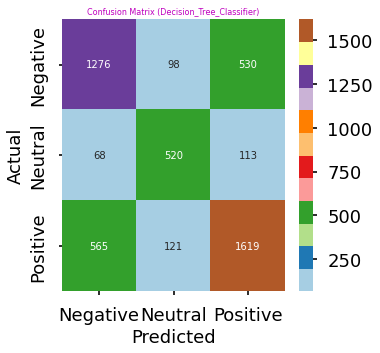

In [82]:
DTclfr = DecisionTreeClassifier()
DTclfr = DTclfr.fit(tfidf_train, y_train)
preddt=DTclfr.predict(tfidf_test)
scoredt=accuracy_score(y_test,preddt)
print(f'Accuracy: {round(scoredt*100,2)}%')

clsfr4 = pd.crosstab(y_test, preddt, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (Decision_Tree_Classifier)",fontsize=8)
sns.heatmap(clsfr4.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr4.iloc[0,0]/(clsfr4.iloc[0,0]+clsfr4.iloc[0,1]))
recall.append(clsfr4.iloc[0,0]/(clsfr4.iloc[0,0]+clsfr4.iloc[1,0]))
f1_score.append(2*clsfr4.iloc[0,0]/(2*clsfr4.iloc[0,0]+clsfr4.iloc[0,1]+clsfr4.iloc[1,0]))
accuracy.append(round(scoredt,2))
classifier_name.append("Decision_Tree_Classifier")
clsfr4

In [83]:
# ### Random Forest Classifier

Accuracy: 74.09%


Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1129,65,710,1904
Neutral,46,530,125,701
Positive,237,89,1979,2305
All,1412,684,2814,4910


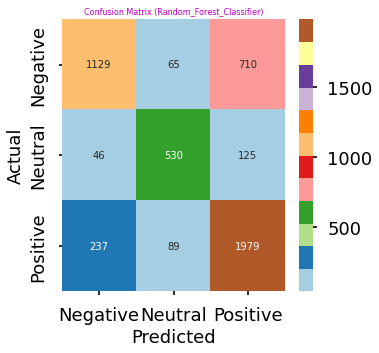

In [84]:
rfclfr = RandomForestClassifier()
rfclfr =rfclfr.fit(tfidf_train, y_train)
predrf=rfclfr.predict(tfidf_test)
scorerf=accuracy_score(y_test,predrf)
print(f'Accuracy: {round(scorerf*100,2)}%')

clsfr5 = pd.crosstab(y_test, predrf, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (Random_Forest_Classifier)",fontsize=8)
sns.heatmap(clsfr5.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr5.iloc[0,0]/(clsfr5.iloc[0,0]+clsfr5.iloc[0,1]))
recall.append(clsfr5.iloc[0,0]/(clsfr5.iloc[0,0]+clsfr5.iloc[1,0]))
f1_score.append(2*clsfr5.iloc[0,0]/(2*clsfr5.iloc[0,0]+clsfr5.iloc[0,1]+clsfr5.iloc[1,0]))
accuracy.append(round(scorerf,2))
classifier_name.append("Random_Forest_Classifier")
clsfr5

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
# ### Adaboost Classifier

Accuracy: 72.02%


Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1265,156,483,1904
Neutral,18,608,75,701
Positive,390,252,1663,2305
All,1673,1016,2221,4910


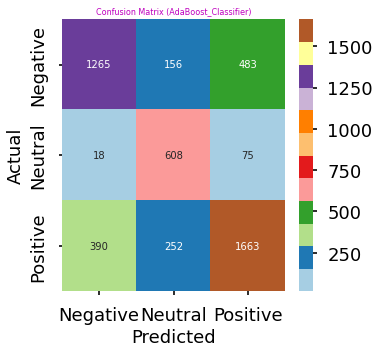

In [87]:
adaclfr = AdaBoostClassifier()
adaclfr =adaclfr.fit(tfidf_train, y_train)
predada=adaclfr.predict(tfidf_test)
scoreada=accuracy_score(y_test,predada)
print(f'Accuracy: {round(scoreada*100,2)}%')

clsfr9 = pd.crosstab(y_test, predada, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (AdaBoost_Classifier)",fontsize=8)
sns.heatmap(clsfr9.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr9.iloc[0,0]/(clsfr9.iloc[0,0]+clsfr9.iloc[0,1]))
recall.append(clsfr9.iloc[0,0]/(clsfr9.iloc[0,0]+clsfr9.iloc[1,0]))
f1_score.append(2*clsfr9.iloc[0,0]/(2*clsfr9.iloc[0,0]+clsfr9.iloc[0,1]+clsfr9.iloc[1,0]))
accuracy.append(round(scoreada,2))
classifier_name.append("AdaBoost_Classifier")
clsfr9

In [88]:
# ### Ridge CLassifier

Accuracy: 78.86%


Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1129,65,710,1904
Neutral,46,530,125,701
Positive,237,89,1979,2305
All,1412,684,2814,4910


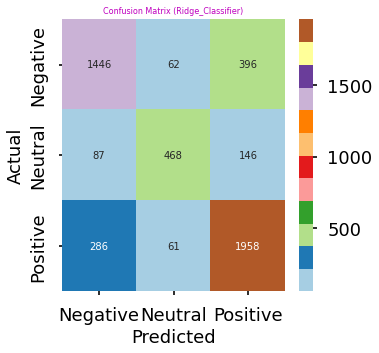

In [89]:
ridgeclfr = RidgeClassifier()
ridgeclfr = ridgeclfr.fit(tfidf_train, y_train)
predridge=ridgeclfr.predict(tfidf_test)
scoreridge=accuracy_score(y_test,predridge)
print(f'Accuracy: {round(scoreridge*100,2)}%')

clsfr6 = pd.crosstab(y_test, predridge, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (Ridge_Classifier)",fontsize=8)
sns.heatmap(clsfr6.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr6.iloc[0,0]/(clsfr6.iloc[0,0]+clsfr6.iloc[0,1]))
recall.append(clsfr6.iloc[0,0]/(clsfr6.iloc[0,0]+clsfr6.iloc[1,0]))
f1_score.append(2*clsfr6.iloc[0,0]/(2*clsfr6.iloc[0,0]+clsfr6.iloc[0,1]+clsfr6.iloc[1,0]))
accuracy.append(round(scoreridge,2))
classifier_name.append("Ridge_Classifier")
clsfr5

In [90]:
# ### SVC Classifier

Accuracy: 67.23%


Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1129,65,710,1904
Neutral,46,530,125,701
Positive,237,89,1979,2305
All,1412,684,2814,4910


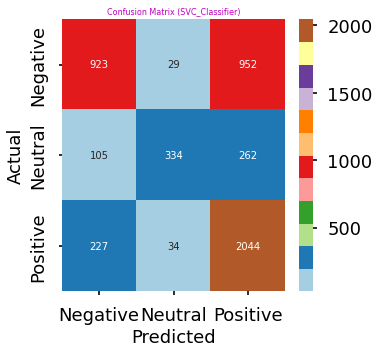

In [91]:
svc = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
svc = svc.fit(tfidf_train, y_train)
predsvc=svc.predict(tfidf_test)
scoresvc=accuracy_score(y_test,predsvc)
print(f'Accuracy: {round(scoresvc*100,2)}%')

clsfr7 = pd.crosstab(y_test, predsvc, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (SVC_Classifier)",fontsize=8)
sns.heatmap(clsfr7.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr7.iloc[0,0]/(clsfr7.iloc[0,0]+clsfr7.iloc[0,1]))
recall.append(clsfr7.iloc[0,0]/(clsfr7.iloc[0,0]+clsfr7.iloc[1,0]))
f1_score.append(2*clsfr7.iloc[0,0]/(2*clsfr7.iloc[0,0]+clsfr7.iloc[0,1]+clsfr7.iloc[1,0]))
accuracy.append(round(scoresvc,2))
classifier_name.append("SVC_Classifier")
clsfr5

In [92]:
# ### Voting Based Classifier

Accuracy: 79.65%


Predicted,Negative,Neutral,Positive,All
Actual,,,,
Negative,1470,54,380,1904
Neutral,85,497,119,701
Positive,300,61,1944,2305
All,1855,612,2443,4910


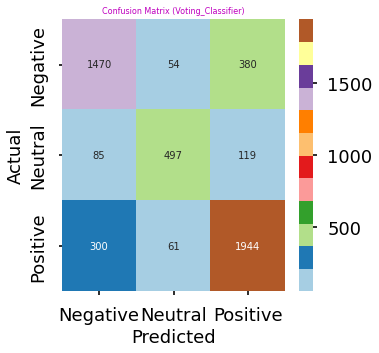

In [93]:
clf1 = Perceptron(tol=1e-3)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = RidgeClassifier()
clf4 = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
vtng = VotingClassifier(estimators=[('perceptron', clf1), ('randorforest', clf2), ('ridge', clf3), ('svc', clf4)], 
                        voting='hard')
vtng = vtng.fit(tfidf_train, y_train)
predvt=vtng.predict(tfidf_test)
scorevt=accuracy_score(y_test,predvt)
print(f'Accuracy: {round(scorevt*100,2)}%')

clsfr8 = pd.crosstab(y_test, predvt, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(5,5))
plt.title("Confusion Matrix (Voting_Classifier)",fontsize=8)
sns.heatmap(clsfr8.iloc[:3,:3],cmap="Paired",fmt="d",annot=True)
precision.append(clsfr8.iloc[0,0]/(clsfr8.iloc[0,0]+clsfr8.iloc[0,1]))
recall.append(clsfr8.iloc[0,0]/(clsfr8.iloc[0,0]+clsfr8.iloc[1,0]))
f1_score.append(2*clsfr8.iloc[0,0]/(2*clsfr8.iloc[0,0]+clsfr8.iloc[0,1]+clsfr8.iloc[1,0]))
accuracy.append(round(scorevt,2))
classifier_name.append("Voting_Classifier")
clsfr8

In [94]:
# ### Comparison of all ML classifiers

In [95]:
precision=list(precision)
recall=list(recall)
f1_score=list(f1_score)
accuracy=list(accuracy)

In [108]:
precision
recall
f1_score
accuracy

[0.8, 0.79, 0.55, 0.7, 0.74, 0.72, 0.79, 0.67, 0.8]

In [97]:
results=[]
results.append(precision)
# precision

In [98]:
results.append(recall)
# recall

In [99]:
results.append(f1_score)
# f1_score

In [100]:
results.append(accuracy)
# accuracy

In [101]:
# results.append(classifier_name)
# # classifier_name

In [102]:
results

[[0.9344159900062461,
  0.9529885829415715,
  0.6851975887474883,
  0.9286754002911208,
  0.9455611390284757,
  0.8902181562280085,
  0.9588859416445623,
  0.9695378151260504,
  0.9645669291338582],
 [0.9534735500318674,
  0.9587837837837838,
  0.9325432999088423,
  0.9494047619047619,
  0.9608510638297872,
  0.9859703819173812,
  0.9432485322896281,
  0.8978599221789884,
  0.9453376205787781],
 [0.9438485804416403,
  0.9558773997979118,
  0.78996138996139,
  0.9389256806475349,
  0.953144786829886,
  0.9356508875739645,
  0.9510029595527787,
  0.9323232323232323,
  0.9548554725560247],
 [0.8, 0.79, 0.55, 0.7, 0.74, 0.72, 0.79, 0.67, 0.8]]

In [103]:

# precision = np.array(precision)
# recall = np.array(recall)
# f1_score = np.array(f1_score)
# accuracy = np.array(accuracy)

# print(len(precision))
# print(len(recall))
# print(len(f1_score))
# print(len(accuracy))
print(len(results))


4


In [104]:
# ### Visualisation of the ML classifiers results

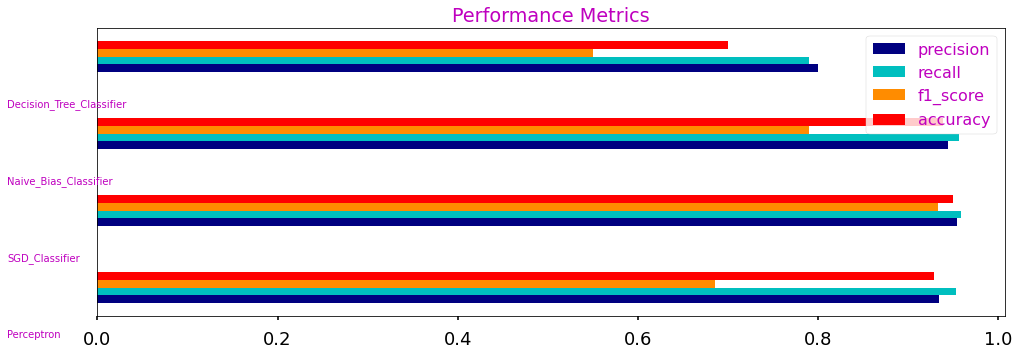

In [109]:
precision, recall, f1_score ,accuracy = results

indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]

plt.figure(figsize=(18, 20))
plt.title("Performance Metrics")

plt.barh(indices +.5 , precision, .1, label="precision",color='navy')

plt.barh(indices +.6, recall, .1, label="recall",color='c')

plt.barh(indices +.7, f1_score, .1, label="f1_score", color='darkorange')

plt.barh(indices +.8, accuracy, .1, label="accuracy", color='red')

plt.yticks(())
plt.legend(loc='upper right')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(right=.95)

plt.subplots_adjust(top=.65)
plt.subplots_adjust(bottom=.45)

for i, c in zip(indices, classifier_name):
    plt.text(-.1,i, c)
plt.savefig("Performance metrics")
plt.show()